<a href="https://colab.research.google.com/github/Wallace-NMelo/Fotografia-Computacional/blob/main/AM_DeepLearning/Modulo2/WallaceN_02_Exemplo_pratico_01_Introducao_ao_Pytorch.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Introdução ao Pytorch

O Pytorch é uma *framework* para aplicações de modelos de redes neurais. Toda sua documentação pode ser vista no site oficial do [Pytorch](https://pytorch.org/).

Esse tutorial apresenta alguns passos introdutórios para produção dos modelos de Deep Learning que serão aplicados e foi baseado no tutorial oferecido pelo [Pytorch Tutorial](https://pytorch.org/tutorials/beginner/basics/intro.html).
O tutorial tem os seguintes passos:
- Tensores
- Datasets e Dataloader
- Construção do Modelo
- Autograd
- Treinamento do modelo
- Salvamento e Carregamento do modelo

Primeiro, importa-se as bibliotecas necessárias para esse tutorial

## Tensores

Tensores são a estrutura de dados especializadas para os calculos dos parâmetros desejados dos modelos. Nesta sessão serão descritos como criar os tensores e algumas operações básicas.


In [1]:
# Bibliotecas necessárias para essa seção
import torch
import numpy as numpy

### Inicialização de Tensores

In [2]:
# Inicialização do Tensor a partir de uma lista
data = [[1, 2], [2, 4]]
x_data = torch.tensor(data)
print(f"Valores a partir de uma lista: {x_data}", end="\n\n\n")

# Inicialização do Tensor a partir de um numpy array
np_array = [[1, 2], [2, 4]]
x_np = torch.tensor(np_array)
print(f"Valores a partir partir de um numpy array: {np_array}", end="\n\n\n")

# Inicialização do Tensor a partir de outro tensor.
# Valores unitários
x_ones = torch.ones_like(x_data)
print(f"Valores unitários a partir de um tensor: {x_ones}", end="\n\n\n")

# Valores aleatórios
x_rand = torch.rand_like(x_data, dtype=torch.float)
print(f"Valores aleatórios a partir de um tensor: {x_rand}", end="\n\n\n")


Valores a partir de uma lista: tensor([[1, 2],
        [2, 4]])


Valores a partir partir de um numpy array: [[1, 2], [2, 4]]


Valores unitários a partir de um tensor: tensor([[1, 1],
        [1, 1]])


Valores aleatórios a partir de um tensor: tensor([[0.9680, 0.3075],
        [0.8088, 0.6609]])




In [3]:
# Alguns atributos do tensor
tensor = torch.rand(3, 4)

print(f"Dimensão do Tensor: {tensor.shape}")
print(f"Tipo de dado do Tensor: {tensor.dtype}")
print(f"Device em que o Tensor está armazenado: {tensor.device}")

Dimensão do Tensor: torch.Size([3, 4])
Tipo de dado do Tensor: torch.float32
Device em que o Tensor está armazenado: cpu


### Operações com Tensores

In [4]:
# Indexing e Slicing:
tensor = torch.ones(4, 4)
print(f"Primeira linha: {tensor[0]}")
print(f"Primeira coluna: {tensor[:, 0]}")
print(f"Última coluna: {tensor[..., -1]}")

tensor[:, 1] = 0
tensor

Primeira linha: tensor([1., 1., 1., 1.])
Primeira coluna: tensor([1., 1., 1., 1.])
Última coluna: tensor([1., 1., 1., 1.])


tensor([[1., 0., 1., 1.],
        [1., 0., 1., 1.],
        [1., 0., 1., 1.],
        [1., 0., 1., 1.]])

In [5]:
# Concatenação de Tensores:
t1 = torch.cat([tensor, tensor, tensor], dim=1)
t1

tensor([[1., 0., 1., 1., 1., 0., 1., 1., 1., 0., 1., 1.],
        [1., 0., 1., 1., 1., 0., 1., 1., 1., 0., 1., 1.],
        [1., 0., 1., 1., 1., 0., 1., 1., 1., 0., 1., 1.],
        [1., 0., 1., 1., 1., 0., 1., 1., 1., 0., 1., 1.]])

In [6]:
# Operações aritméticas
tensor1 = torch.rand(3, 4)
tensor2 = torch.rand_like(tensor1)

print(tensor1)
print(tensor2)


tensor([[0.6868, 0.8389, 0.9742, 0.6449],
        [0.7709, 0.7292, 0.2748, 0.6968],
        [0.5309, 0.3277, 0.1390, 0.5306]])
tensor([[0.6835, 0.0212, 0.8673, 0.7079],
        [0.6613, 0.4334, 0.8104, 0.5480],
        [0.6663, 0.7882, 0.5322, 0.0750]])


In [7]:
# Soma e Subtração (opera elemento a elemento)
sum_tensor = tensor1 + tensor2
sub_tensor = tensor1 - tensor2

print(sum_tensor)
print(sub_tensor)

tensor([[1.3703, 0.8601, 1.8415, 1.3528],
        [1.4322, 1.1626, 1.0852, 1.2447],
        [1.1972, 1.1159, 0.6712, 0.6056]])
tensor([[ 0.0034,  0.8177,  0.1068, -0.0631],
        [ 0.1095,  0.2958, -0.5356,  0.1488],
        [-0.1355, -0.4604, -0.3932,  0.4555]])


In [8]:
# Multiplicação e Divisão (opera elemento a elemento)
mul_tensor = tensor1 * tensor2  ## ou torch.mul(tensor1, tensor2)
div_tensor = tensor1 / tensor2  ## ou torch.div(tensor1, tensor2)

print(mul_tensor)
print(div_tensor)

tensor([[0.4694, 0.0178, 0.8449, 0.4565],
        [0.5098, 0.3160, 0.2227, 0.3818],
        [0.3537, 0.2583, 0.0740, 0.0398]])
tensor([[ 1.0049, 39.5261,  1.1232,  0.9109],
        [ 1.1656,  1.6825,  0.3391,  1.2716],
        [ 0.7967,  0.4158,  0.2612,  7.0709]])


In [9]:
# Multiplicação Matricial sobre os tensores
mul_mat_tensor1 = tensor1 @ tensor2.T  # Note: tensor2.T significa a transposição da matriz.
mul_mat_tensor2 = torch.matmul(tensor1, tensor2.T)

print(f"Forma 1: {mul_mat_tensor1}")
print(f"Forma 2: {mul_mat_tensor2}")

Forma 1: tensor([[1.7887, 1.9606, 1.6857],
        [1.2739, 1.4303, 1.2869],
        [0.8660, 0.8965, 0.7259]])
Forma 2: tensor([[1.7887, 1.9606, 1.6857],
        [1.2739, 1.4303, 1.2869],
        [0.8660, 0.8965, 0.7259]])


## Datasets e Dataloaders

Datasets são os conjuntos de dados utilizado para treinamento dos parametros dos modelos. Dataloaders são a estrutura para treinamento dos modelos no qual será feita a separação de dos *minibatchs*, eleatorização dos dados etc.

In [10]:
# Bibliotecas necessárias para essa seção
import torch
from torch.utils.data import Dataset
from torchvision import datasets
from torchvision.transforms import ToTensor
import matplotlib.pyplot as plt

### Dataset

Esse exemplo faz o carregamento do dataset implementado na própria framework. Os dados utilizado aqui é o Fashion-MNIST. Outros datasets já implementados podem ser vistas em [Pytorch Dataset](https://pytorch.org/vision/stable/datasets.html)


In [11]:
# Carregamento dos dados

training_data = datasets.FashionMNIST(
    root="data",
    train=True,
    download=True,
    transform=ToTensor()
)

test_data = datasets.FashionMNIST(
    root="data",
    train=False,
    download=True,
    transform=ToTensor()
)

100%|██████████| 26421880/26421880 [00:01<00:00, 14798381.86it/s]


Extracting data/FashionMNIST/raw/train-images-idx3-ubyte.gz to data/FashionMNIST/raw



100%|██████████| 29515/29515 [00:00<00:00, 271602.70it/s]


Extracting data/FashionMNIST/raw/train-labels-idx1-ubyte.gz to data/FashionMNIST/raw



100%|██████████| 4422102/4422102 [00:00<00:00, 5005382.51it/s]


Extracting data/FashionMNIST/raw/t10k-images-idx3-ubyte.gz to data/FashionMNIST/raw



100%|██████████| 5148/5148 [00:00<00:00, 22824817.12it/s]

Extracting data/FashionMNIST/raw/t10k-labels-idx1-ubyte.gz to data/FashionMNIST/raw



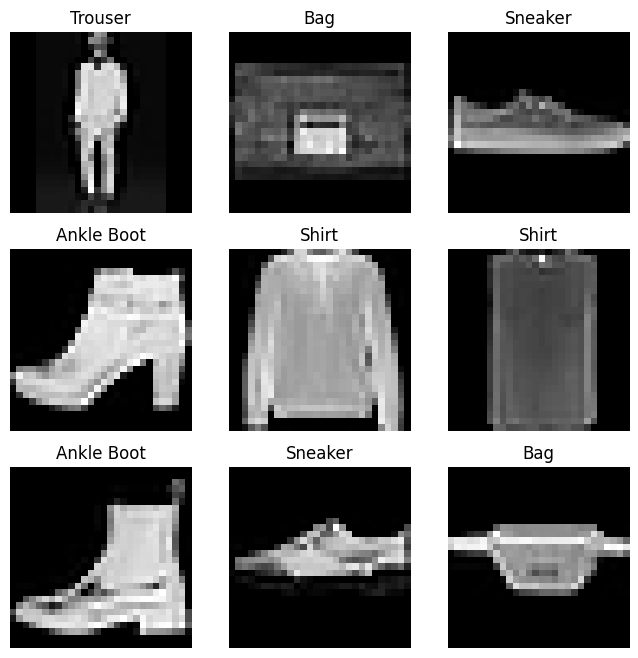

In [12]:
# Visualização dos datasets
labels_map = {
    0: "T-Shirt",
    1: "Trouser",
    2: "Pullover",
    3: "Dress",
    4: "Coat",
    5: "Sandal",
    6: "Shirt",
    7: "Sneaker",
    8: "Bag",
    9: "Ankle Boot",
}
figure = plt.figure(figsize=(8, 8))
cols, rows = 3, 3
for i in range(1, cols * rows + 1):
    sample_idx = torch.randint(len(training_data), size=(1,)).item()
    img, label = training_data[sample_idx]
    figure.add_subplot(rows, cols, i)
    plt.title(labels_map[label])
    plt.axis("off")
    plt.imshow(img.squeeze(), cmap="gray")
plt.show()

### Criando um Dataset customizável a partir de seus arquivos.

Deve-se utilizar a class implementada no Pytorch (torch.utils.data.Dataset) e implementar três funções: *__init__*, *__len__* e *__getitem__*

In [13]:
# Exemplo de um Dataset customizado
import os
import pandas as pd
from torchvision.io import read_image

class CustomImageDataset(Dataset):
    def __init__(self, annotations_file, img_dir, transform=None, target_transform=None):
        self.img_labels = pd.read_csv(annotations_file)
        self.img_dir = img_dir
        self.transform = transform
        self.target_transform = target_transform

    def __len__(self):
        return len(self.img_labels)

    def __getitem__(self, idx):
        img_path = os.path.join(self.img_dir, self.img_labels.iloc[idx, 0])
        image = read_image(img_path)
        label = self.img_labels.iloc[idx, 1]
        if self.transform:
            image = self.transform(image)
        if self.target_transform:
            label = self.target_transform(label)
        return image, label


### Preparação dos dados para treinamento.

Após os datasets serem construídos, o próximo passo é montar o *dataloader*. No exemplo a seguir, utiliza-se a classe do Pytorch *torch.utils.data.DataLoader*.


In [14]:
# Construção dos dataloaders.
from torch.utils.data import DataLoader

train_dataloader = DataLoader(training_data, batch_size=64, shuffle=True)
test_dataloader = DataLoader(test_data, batch_size=64, shuffle=True)


### Iterando sobre o DataLoader.

Feature batch shape: torch.Size([64, 1, 28, 28])
Labels batch shape: torch.Size([64])


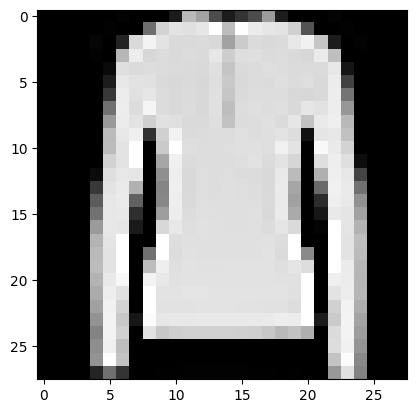

Label: 2


In [15]:
# Display image and label.
train_features, train_labels = next(iter(train_dataloader))
print(f"Feature batch shape: {train_features.size()}")
print(f"Labels batch shape: {train_labels.size()}")
img = train_features[0].squeeze()
label = train_labels[0]
plt.imshow(img, cmap="gray")
plt.show()
print(f"Label: {label}")

## Construindo a Rede Neural

Esta seção sera descrito a construção das redes neurais, como camadas e blocos. Os blocos imploementados podem ser vistos em [torch.nn](https://pytorch.org/docs/stable/nn.html), todas sendo subclasses do [nn.Module](https://pytorch.org/docs/stable/generated/torch.nn.Module.html)

In [16]:
import os
import torch
from torch import nn
from torch.utils.data import DataLoader
from torchvision import datasets, transforms

### Utilização do dispositivo de treinamento

Deve-se utilizar para treinar os modelos *hardwares* que acelerem, como GPU ou MPS, caso ,ão possua, utilize a própria CPU.

In [17]:
# Identificando o dispositivo disponível para treino.
device = (
    "cuda"
    if torch.cuda.is_available()
    else "mps"
    if torch.backends.mps.is_available()
    else "cpu"
)
print(f"Using {device} device")

Using cuda device


### Definição da Classe

A classe que será a rede neural proposta deve ser uma subclasse de nn.Module e inicializa-se as camadas da rede a partir da função *__init__*. Após isso, deve ser implementada o método *forward*.

In [18]:
class NeuralNetwork(nn.Module):
    def __init__(self):
        super().__init__()
        self.flatten = nn.Flatten()
        self.linear_relu_stack = nn.Sequential(
            nn.Linear(28*28, 512),
            nn.ReLU(),
            nn.Linear(512, 512),
            nn.ReLU(),
            nn.Linear(512, 10),
        )

    def forward(self, x):
        x = self.flatten(x)
        logits = self.linear_relu_stack(x)
        return logits

In [19]:
# Transferindo a rede neural para o dispositivo disponível.
model = NeuralNetwork().to(device)
print(model)

NeuralNetwork(
  (flatten): Flatten(start_dim=1, end_dim=-1)
  (linear_relu_stack): Sequential(
    (0): Linear(in_features=784, out_features=512, bias=True)
    (1): ReLU()
    (2): Linear(in_features=512, out_features=512, bias=True)
    (3): ReLU()
    (4): Linear(in_features=512, out_features=10, bias=True)
  )
)


In [20]:
# Exemplo do forward implementado
X = torch.rand(1, 28, 28, device=device)
logits = model(X)
pred_probab = nn.Softmax(dim=1)(logits)
y_pred = pred_probab.argmax(1)
print(f"Predicted class: {y_pred}")

Predicted class: tensor([1], device='cuda:0')


### Camadas do modelo

Utilizando uma imagem colorida, com entradas RGB, tem-se que as imagens tem a seguinte dimensão: 3x28x28 (CxHxW), no qual C é o número de canais, H a altura da imagem e W a largura da imagem.

In [21]:
# Exemplo de uma imagem com entrada RGB
input_image = torch.rand(3,28,28)
print(input_image.size())

torch.Size([3, 28, 28])


In [22]:
# Flatten: Converte a imagem 28x28 para um array contínuo de 784 pixels.
flatten = nn.Flatten()
flat_image = flatten(input_image)
print(flat_image.size())

torch.Size([3, 784])


In [23]:
# nn.Linear é a camada totalmente conectada, no qual aplica a transformação linear, armazenando peso e bias.
layer1 = nn.Linear(in_features=28*28, out_features=20)
hidden1 = layer1(flat_image)
print(hidden1.size())

torch.Size([3, 20])


In [24]:
# nn.ReLU, aplica a função de ativação ReLU aos valores de saída da rede.
print(f"Before ReLU: {hidden1}\n\n")
hidden1 = nn.ReLU()(hidden1)
print(f"After ReLU: {hidden1}")

Before ReLU: tensor([[-0.3910,  0.1534,  0.2995, -0.2670,  0.2814, -0.4617, -0.2182,  0.3476,
         -0.4691, -0.0671, -0.1756,  0.0242,  0.4003, -0.3971,  0.0713, -0.2193,
         -0.2682,  0.0584,  0.0942, -0.3619],
        [-0.3675,  0.1281,  0.3511, -0.4193, -0.0061, -0.3911, -0.1022,  0.1861,
         -0.0139,  0.1452, -0.2845, -0.0847,  0.3660, -0.2437,  0.0076,  0.2221,
         -0.4978,  0.2197,  0.1557, -0.3482],
        [-0.1294, -0.0176,  0.5494, -0.3873,  0.0306, -0.1355,  0.1238, -0.0545,
         -0.2005, -0.3067, -0.5396,  0.0627, -0.0568, -0.1032, -0.0592, -0.1021,
         -0.5452,  0.1496, -0.0717, -0.5000]], grad_fn=<AddmmBackward0>)


After ReLU: tensor([[0.0000, 0.1534, 0.2995, 0.0000, 0.2814, 0.0000, 0.0000, 0.3476, 0.0000,
         0.0000, 0.0000, 0.0242, 0.4003, 0.0000, 0.0713, 0.0000, 0.0000, 0.0584,
         0.0942, 0.0000],
        [0.0000, 0.1281, 0.3511, 0.0000, 0.0000, 0.0000, 0.0000, 0.1861, 0.0000,
         0.1452, 0.0000, 0.0000, 0.3660, 0.0000, 0.00

In [25]:
# nn.Sequencial, é o módulo de no qual agrupa todos os módulos de forma sequencial.
seq_modules = nn.Sequential(
    flatten,
    layer1,
    nn.ReLU(),
    nn.Linear(20, 10)
)
input_image = torch.rand(3,28,28)
logits = seq_modules(input_image)

In [26]:
# Softmax transforma os valores no intervalo (-inf, +inf) para escala [0, 1], representando a probablidade de cada classe e soma igual a 1.
softmax = nn.Softmax(dim=1)
pred_probab = softmax(logits)

In [27]:
# Representando os parâmetros dos modelos.
print(f"Model structure: {model}\n\n")

for name, param in model.named_parameters():
    print(f"Layer: {name} | Size: {param.size()} | Values : {param[:2]} \n")

Model structure: NeuralNetwork(
  (flatten): Flatten(start_dim=1, end_dim=-1)
  (linear_relu_stack): Sequential(
    (0): Linear(in_features=784, out_features=512, bias=True)
    (1): ReLU()
    (2): Linear(in_features=512, out_features=512, bias=True)
    (3): ReLU()
    (4): Linear(in_features=512, out_features=10, bias=True)
  )
)


Layer: linear_relu_stack.0.weight | Size: torch.Size([512, 784]) | Values : tensor([[-0.0133,  0.0320, -0.0180,  ..., -0.0283,  0.0078,  0.0199],
        [ 0.0076, -0.0140,  0.0136,  ...,  0.0092, -0.0243, -0.0345]],
       device='cuda:0', grad_fn=<SliceBackward0>) 

Layer: linear_relu_stack.0.bias | Size: torch.Size([512]) | Values : tensor([ 0.0215, -0.0100], device='cuda:0', grad_fn=<SliceBackward0>) 

Layer: linear_relu_stack.2.weight | Size: torch.Size([512, 512]) | Values : tensor([[-0.0397,  0.0095, -0.0202,  ..., -0.0081,  0.0365, -0.0086],
        [ 0.0427, -0.0410, -0.0175,  ..., -0.0034, -0.0014, -0.0334]],
       device='cuda:0', grad_fn=<Sl

## Autograd

Ao treinar as redes neurais, os algoritmos de retropropagação (bachpropagation) são utilizados para ajustar os parâmetros dos modelos de acordo com os gradientes da função de perda.

Para computar os gradientes, o Pytorch possui uma ferramenta chamada torch.autograd, no qual computa os gradientes de qualquer gráfico computacional. O exemplo a seguir mostra a saída dos gradientes.

In [28]:
import torch

x = torch.ones(5)  # Tensor de entrada
y = torch.zeros(3)  # Saída esperada
w = torch.randn(5, 3, requires_grad=True) # Perceptron com 5 entradas e 3 saídas
b = torch.randn(3, requires_grad=True)
z = torch.matmul(x, w)+b
loss = torch.nn.functional.binary_cross_entropy_with_logits(z, y)

In [29]:
print(f"Gradient function for z = {z.grad_fn}")
print(f"Gradient function for loss = {loss.grad_fn}")

Gradient function for z = <AddBackward0 object at 0x7a7ddb7d35e0>
Gradient function for loss = <BinaryCrossEntropyWithLogitsBackward0 object at 0x7a7ddb7d2650>


In [30]:
# Computando os gradientes
loss.backward()
print(w.grad)
print(b.grad)

tensor([[0.0665, 0.0926, 0.2209],
        [0.0665, 0.0926, 0.2209],
        [0.0665, 0.0926, 0.2209],
        [0.0665, 0.0926, 0.2209],
        [0.0665, 0.0926, 0.2209]])
tensor([0.0665, 0.0926, 0.2209])


## Treinamento do modelo

Entendido os passos descritos anteriormente, agora deve-se treinar o modelo para ajustar os parâmetros e minimizar o erro associado as previsões.

Recaptulando os códigos descritos anteriormente, temos:
- O dataset que será utilizado, no caso Fashion MNIST;
- O dataloader que fará os *minibatchs*
- O modelo da rede neural

In [31]:
import torch
from torch import nn
from torch.utils.data import DataLoader
from torchvision import datasets
from torchvision.transforms import ToTensor

training_data = datasets.FashionMNIST(
    root="data",
    train=True,
    download=True,
    transform=ToTensor()
)

test_data = datasets.FashionMNIST(
    root="data",
    train=False,
    download=True,
    transform=ToTensor()
)

train_dataloader = DataLoader(training_data, batch_size=64)
test_dataloader = DataLoader(test_data, batch_size=64)

class NeuralNetwork(nn.Module):
    def __init__(self):
        super().__init__()
        self.flatten = nn.Flatten()
        self.linear_relu_stack = nn.Sequential(
            nn.Linear(28*28, 512),
            nn.ReLU(),
            nn.Linear(512, 512),
            nn.ReLU(),
            nn.Linear(512, 10),
        )

    def forward(self, x):
        x = self.flatten(x)
        logits = self.linear_relu_stack(x)
        return logits

model = NeuralNetwork()

### Hiperparametros
- **Number of Epochs** - Número de vezes que será iterado pelo dataset.
- **Batch Size** - Número de dados utilizados em cada propagação da rede neural;
- **Learning Rate** - Fator de aprendizado dos parâmetros dos modelos

In [32]:
learning_rate = 1e-3
batch_size = 64
epochs = 5

### Treinamento

Itera sobre os dados para convergir os parâmetros do modelo.

In [33]:
def train_loop(dataloader, model, loss_fn, optimizer):
    size = len(dataloader.dataset)
    # Define o modelo para o modo de treinamento.
    model.train()
    for batch, (X, y) in enumerate(dataloader):
        # Computa as previsões e a perda
        pred = model(X)
        loss = loss_fn(pred, y)

        # Backpropagation
        loss.backward()
        optimizer.step()
        optimizer.zero_grad()

        if batch % 100 == 0:
            loss, current = loss.item(), (batch + 1) * len(X)
            print(f"loss: {loss:>7f}  [{current:>5d}/{size:>5d}]")


### Validação/Teste

Itera sobre o dataset para avaliar o desempenho do modelo.

In [34]:
def test_loop(dataloader, model, loss_fn):
    # Define o modelo para o modo de avaliação.
    model.eval()
    size = len(dataloader.dataset)
    num_batches = len(dataloader)
    test_loss, correct = 0, 0

    # Evaluating the model with torch.no_grad() ensures that no gradients are computed during test mode
    # also serves to reduce unnecessary gradient computations and memory usage for tensors with requires_grad=True
    with torch.no_grad():
        for X, y in dataloader:
            pred = model(X)
            test_loss += loss_fn(pred, y).item()
            correct += (pred.argmax(1) == y).type(torch.float).sum().item()

    test_loss /= num_batches
    correct /= size
    print(f"Test Error: \n Accuracy: {(100*correct):>0.1f}%, Avg loss: {test_loss:>8f} \n")

### Função de Perda

Função definida para minimizar e, assim, avaliar o desempenho do modelo.

In [35]:
# Função escolhida: CrossEntropy
loss_fn = nn.CrossEntropyLoss()

### Otimizadores

Processo de ajuste do modelo para reduzir o erro para cada passo do treino.

In [36]:
optimizer = torch.optim.SGD(model.parameters(), lr=learning_rate)

### Treinamento

Agrupando todos os passos, temos:

In [37]:
epochs = 10
for t in range(epochs):
    print(f"Epoch {t+1}\n-------------------------------")
    train_loop(train_dataloader, model, loss_fn, optimizer)
    test_loop(test_dataloader, model, loss_fn)
print("Fim!")

Epoch 1
-------------------------------
loss: 2.303193  [   64/60000]
loss: 2.289031  [ 6464/60000]
loss: 2.264884  [12864/60000]
loss: 2.260382  [19264/60000]
loss: 2.241906  [25664/60000]
loss: 2.219818  [32064/60000]
loss: 2.220059  [38464/60000]
loss: 2.188154  [44864/60000]
loss: 2.192688  [51264/60000]
loss: 2.155976  [57664/60000]
Test Error: 
 Accuracy: 47.0%, Avg loss: 2.149746 

Epoch 2
-------------------------------
loss: 2.165938  [   64/60000]
loss: 2.151415  [ 6464/60000]
loss: 2.090774  [12864/60000]
loss: 2.110286  [19264/60000]
loss: 2.057341  [25664/60000]
loss: 2.000840  [32064/60000]
loss: 2.025168  [38464/60000]
loss: 1.946951  [44864/60000]
loss: 1.968002  [51264/60000]
loss: 1.889362  [57664/60000]
Test Error: 
 Accuracy: 56.6%, Avg loss: 1.882840 

Epoch 3
-------------------------------
loss: 1.925401  [   64/60000]
loss: 1.886339  [ 6464/60000]
loss: 1.767612  [12864/60000]
loss: 1.814586  [19264/60000]
loss: 1.705173  [25664/60000]
loss: 1.661999  [32064/600

## Salvar e Carregar os pesos dos modelos

Nesta seção será descrita o salvamento de carregamento do modelo desejado.

In [38]:
import torch
import torchvision.models as models

In [39]:
# Carregando pesos pré-treinados:
model = models.vgg16(weights='IMAGENET1K_V1')
torch.save(model.state_dict(), 'model_weights.pth')  # Salvando o modelo na máquina

Downloading: "https://download.pytorch.org/models/vgg16-397923af.pth" to /root/.cache/torch/hub/checkpoints/vgg16-397923af.pth
100%|██████████| 528M/528M [00:05<00:00, 97.7MB/s]


In [40]:
# Carregando modelo salvo na maquina:
model = models.vgg16() # Pesos não especificado
model.load_state_dict(torch.load('model_weights.pth'))
model.eval()

VGG(
  (features): Sequential(
    (0): Conv2d(3, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (1): ReLU(inplace=True)
    (2): Conv2d(64, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (3): ReLU(inplace=True)
    (4): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
    (5): Conv2d(64, 128, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (6): ReLU(inplace=True)
    (7): Conv2d(128, 128, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (8): ReLU(inplace=True)
    (9): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
    (10): Conv2d(128, 256, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (11): ReLU(inplace=True)
    (12): Conv2d(256, 256, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (13): ReLU(inplace=True)
    (14): Conv2d(256, 256, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (15): ReLU(inplace=True)
    (16): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1